In [18]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close.values

In [20]:
cl.shape

(1259,)

In [21]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.00580061],
       [0.00554564],
       [0.01090005],
       ...,
       [0.82668281],
       [0.84064253],
       [0.83783784]])

In [22]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)


In [23]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [24]:
#Build the model
model = Sequential()
model.add(LSTM(64,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/300
32/32 [==============================] - 1s 33ms/step - loss: 0.0052 - val_loss: 0.0206
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 9.5838e-04
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 9.2067e-04
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 5.7952e-04 - val_loss: 0.0012
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 4.0825e-04 - val_loss: 8.5950e-04
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 2.9048e-04 - val_loss: 6.5359e-04
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 2.4437e-04 - val_loss: 5.9167e-04
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 2.3106e-04 - val_loss: 5.8279e-04
Epoch 10/300
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 1.5274e-04 - val_loss: 0.0013
Epoch 80/300
32/32 [==============================] - 0s 2ms/step - loss: 1.5194e-04 - val_loss: 0.0013
Epoch 81/300
32/32 [==============================] - 0s 2ms/step - loss: 1.5113e-04 - val_loss: 0.0013
Epoch 82/300
32/32 [==============================] - 0s 2ms/step - loss: 1.5032e-04 - val_loss: 0.0013
Epoch 83/300
32/32 [==============================] - 0s 2ms/step - loss: 1.4952e-04 - val_loss: 0.0013
Epoch 84/300
32/32 [==============================] - 0s 2ms/step - loss: 1.4871e-04 - val_loss: 0.0013
Epoch 85/300
32/32 [==============================] - 0s 2ms/step - loss: 1.4790e-04 - val_loss: 0.0013
Epoch 86/300
32/32 [==============================] - 0s 2ms/step - loss: 1.4710e-04 - val_loss: 0.0013
Epoch 87/300
32/32 [==============================] - 0s 2ms/step - loss: 1.4629e-04 - val_loss: 0.0013
Epoch 88/300
32/32 [==============================] - 0s 2ms/step - loss: 1.4

32/32 [==============================] - 0s 2ms/step - loss: 9.8093e-05 - val_loss: 6.8145e-04
Epoch 156/300
32/32 [==============================] - 0s 2ms/step - loss: 9.7547e-05 - val_loss: 6.7669e-04
Epoch 157/300
32/32 [==============================] - 0s 2ms/step - loss: 9.7059e-05 - val_loss: 6.7162e-04
Epoch 158/300
32/32 [==============================] - 0s 2ms/step - loss: 9.6537e-05 - val_loss: 6.6715e-04
Epoch 159/300
32/32 [==============================] - 0s 2ms/step - loss: 9.6065e-05 - val_loss: 6.6247e-04
Epoch 160/300
32/32 [==============================] - 0s 2ms/step - loss: 9.5567e-05 - val_loss: 6.5830e-04
Epoch 161/300
32/32 [==============================] - 0s 2ms/step - loss: 9.5111e-05 - val_loss: 6.5400e-04
Epoch 162/300
32/32 [==============================] - 0s 2ms/step - loss: 9.4638e-05 - val_loss: 6.5015e-04
Epoch 163/300
32/32 [==============================] - 0s 2ms/step - loss: 9.4200e-05 - val_loss: 6.4624e-04
Epoch 164/300
32/32 [============

32/32 [==============================] - 0s 2ms/step - loss: 8.5826e-05 - val_loss: 5.3023e-04
Epoch 231/300
32/32 [==============================] - 0s 2ms/step - loss: 8.4911e-05 - val_loss: 5.2037e-04
Epoch 232/300
32/32 [==============================] - 0s 2ms/step - loss: 8.3346e-05 - val_loss: 5.1631e-04
Epoch 233/300
32/32 [==============================] - 0s 2ms/step - loss: 8.1399e-05 - val_loss: 5.1881e-04
Epoch 234/300
32/32 [==============================] - 0s 2ms/step - loss: 7.9467e-05 - val_loss: 5.2804e-04
Epoch 235/300
32/32 [==============================] - 0s 2ms/step - loss: 7.7944e-05 - val_loss: 5.4371e-04
Epoch 236/300
32/32 [==============================] - 0s 2ms/step - loss: 7.7127e-05 - val_loss: 5.6479e-04
Epoch 237/300
32/32 [==============================] - 0s 2ms/step - loss: 7.7106e-05 - val_loss: 5.8945e-04
Epoch 238/300
32/32 [==============================] - 0s 2ms/step - loss: 7.7722e-05 - val_loss: 6.1516e-04
Epoch 239/300
32/32 [============

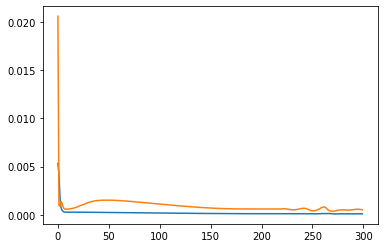

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [26]:
X_test[0]

array([[0.46959459],
       [0.46577002],
       [0.46800102],
       [0.46169046],
       [0.46717236],
       [0.46755482],
       [0.47176186]])

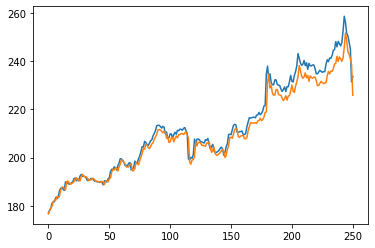

In [27]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [28]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[238.54498]], actual:[[231.44]]


In [29]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [30]:
#result_df.plot(kind='line')

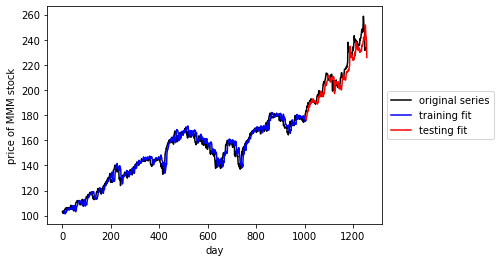

In [31]:
# plot original data
plt.plot(scl.inverse_transform(y.reshape(-1,1)), color='k')

Xtrain = model.predict(X_train)
Xtest = model.predict(X_test)

# plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
split_pt = int(X.shape[0]*0.80) + 7 # window_size
plt.plot(np.arange(7,split_pt,1), scl.inverse_transform(Xtrain), color='b')
plt.plot(np.arange(split_pt,split_pt+len(Xtest),1), scl.inverse_transform(Xtest), color='r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('price of MMM stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [32]:
X_test[249]

array([[0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875],
       [0.91420194]])

In [33]:
X_test[248]

array([[0.93026517],
       [0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875]])